# Install anaconda package to access python and jupyter

We can acess following webapge https://www.anaconda.com/products/individual

# Explore the dataset

First we will load the dataset "input_pilot_data.csv" to examine input components. Wireline logs , any indirect indicators, etc. Total five wireline logs are available. We will use the pandas library to load the data into a dataframe, which provides a convenient data structure to work with well log data.

In [1]:
#import library and read input data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
set_option("display.max_rows", 10)
filename = 'input_pilot_data.csv'

ip_data = pd.read_csv(filename)

In [2]:
# Basic statistics which includes additional 1, 5 and 95, 99 percentiles
ip_data.describe()
#ip_data.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [3]:
ip_data.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

In [4]:
ip_data['Well Name'].values

array(['SHRIMPLIN', 'SHRIMPLIN', 'SHRIMPLIN', ..., 'CHURCHMAN BIBLE',
       'CHURCHMAN BIBLE', 'CHURCHMAN BIBLE'], dtype=object)

In [5]:
ip_data[ip_data['Well Name'] == 'SHRIMPLIN'].describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,4.384289,2910.501062,69.408896,0.659679,7.708493,12.173705,4.219958,1.488323,0.514482
std,2.207070,68.055644,37.299536,0.232894,4.279453,5.317152,0.902823,0.500395,0.289757
min,2.000000,2793.000000,13.280000,0.297000,-4.300000,1.590000,2.700000,1.000000,0.010000
25%,2.500000,2851.750000,46.895000,0.486000,4.300000,8.065000,3.400000,1.000000,0.261000
50%,3.000000,2910.500000,69.480000,0.580000,7.300000,12.170000,4.000000,1.000000,0.513000
75%,6.000000,2969.250000,85.995000,0.827500,11.150000,15.127500,5.000000,2.000000,0.765000
max,9.000000,3028.000000,361.150000,1.480000,18.500000,37.470000,6.300000,2.000000,1.000000


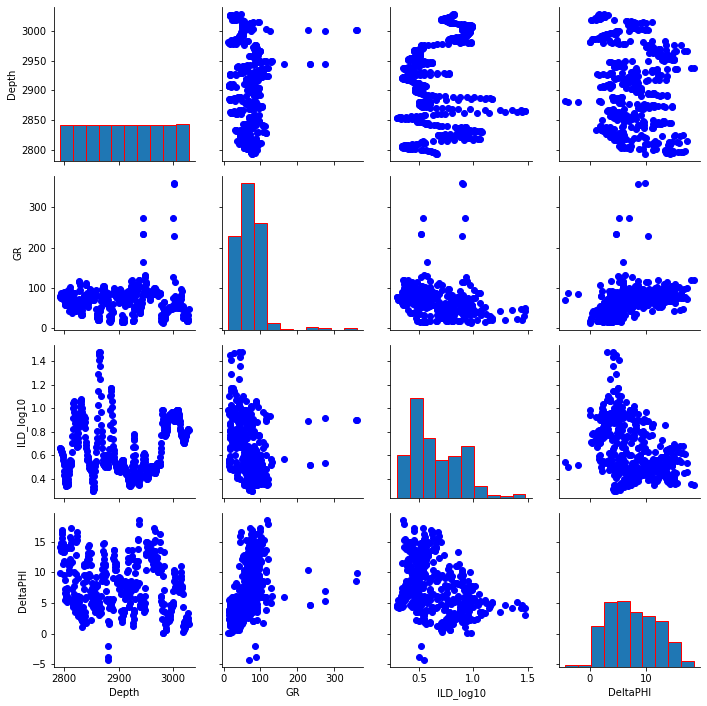

In [11]:
t = sns.PairGrid~(ip_data[ip_data['Well Name'] == 'SHRIMPLIN'], vars = ['Depth', 'GR', 'ILD_log10','DeltaPHI'])
t.map_diag(plt.hist, edgecolor='red')
t.map_offdiag(plt.scatter, color='b')

In [294]:
# clean up data and change Well Name and formation as categorial data
ip_data['Well Name'] = ip_data['Well Name'].astype('category')
ip_data['Formation'] = ip_data['Formation'].astype('category')
ip_data['Well Name'].unique()

['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE']
Categories (10, object): ['ALEXANDER D', 'CHURCHMAN BIBLE', 'CROSS H CATTLE', 'KIMZEY A', ..., 'NOLAN', 'Recruit F9', 'SHANKLE', 'SHRIMPLIN']

In [295]:
# volume of shale and fluid sub
def fluid_sub(PHI, RHOG, RHOF):
    RHOB = (1-PHI)*RHOG + PHI*RHOF
    return RHOB

def vol_shale(GR, GRsand, GRshale):
    vshale= (GR-GRsand)/(GRshale-GRsand)
    return vshale



In [296]:
# re-caluclate NPHI and PHID
#ip_data['RHOB']= fluid_sub(ip_data.PHIND, ip_data.rhog, 1.03)
#ip_data['Vsh']=vol_shale(ip_data.GR, 20, 60)
ip_data['NPHI'] = 1/2 *(2*ip_data.PHIND + ip_data.DeltaPHI)
ip_data['PHID'] = 1/2 *(2*ip_data.PHIND - ip_data.DeltaPHI)

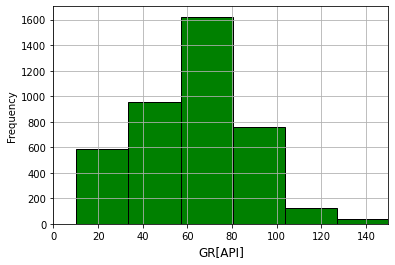

In [13]:
logs=ip_data.copy()
plt.hist(logs.GR.dropna(), bins=15, color='g', edgecolor='k')
plt.xlabel('GR[API]', fontsize=12)
plt.ylabel('Frequency')
plt.xlim(0,150)
plt.grid(True)

In [297]:
def remove_outlier(df_in, col_name):
    q1= df_in[col_name].quantile(0.25)
    q3=df_in[col_name].quantile(0.75)
    iqr = q3-q1
    lowb= q1-1.5*iqr
    upb=q3+1.5*iqr
    df_out=df_in.loc[(df_in[col_name]> lowb) & (df_in[col_name] <upb)]
    return df_out

#data1 = remove_outlier(ip_data, 'GR')

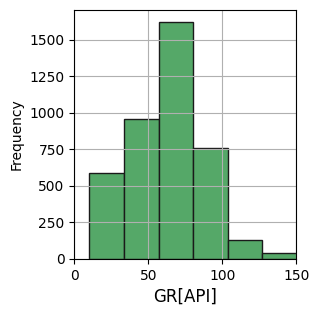

In [298]:
#Histogram plot of GR, SP, NPHI, RHOB
logs=ip_data.copy()
plt.figure(figsize=(14,7))
plt.subplot(241)
plt.hist(logs.GR.dropna(), bins=15, color='g', edgecolor='k')
plt.xlabel('GR[API]', fontsize=12)
plt.ylabel('Frequency')
plt.xlim(0,150)
plt.grid(True)

plt.subplots_adjust(top=0.9, bottom=.1, left=0.10, right=0.9, hspace=0.25, wspace=0.35)

In [299]:
#plt.hist(ip_data['Well Name'] == 'NEWBY')

In [300]:
# call the triple combo log function as defined
def triple_combo_log(logs):
    logs = logs.sort_values(by='Depth')
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    logs=logs[(logs.Depth >= ztop) & (logs.Depth <= zbot)]
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15), sharey=True)
#    fig.suptitle("Triple-combo Log display data", fontsize=16)
    fig.subplots_adjust(top=0.85,wspace=0.1)
    
# setting for all axes
    for axes in ax:
        axes.set_ylim (ztop,zbot)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)
        
# First track GR, CALI, PE logs to display
        ax0 = ax[0].twiny()
        ax0.set_xlim(0,250)
        ax0.spines['top'].set_position(('outward',0))
        ax0.plot(logs.GR, logs.Depth, '-g', label= "GR")
        ax0.set_xlabel('GR[API]',color='g')    
        ax0.tick_params(axis='x', colors='g')
        ax0.grid(True)

# second track resistivty

        ax1 = ax[1].twiny()
        ax1.set_xlim(0.0, 1.5)
        ax1.spines['top'].set_position(('outward', 0))
        ax1.plot(logs.ILD_log10, logs.Depth, '-r', label="Rt (ohm-m)")
        ax1.set_xlabel('ILD(ohm.m)', color = 'r')
        ax1.tick_params(axis='x', colors='r')
                
# Third track NPHI, RHOB
        ax2 = ax[2].twiny()
        ax2.set_xlim(60, 0)
        ax2.spines['top'].set_position(('outward', 0))
        ax2.plot(logs.PHIND, logs.Depth, '--k', label = "NPHI (%)")
        ax2.set_xlabel('PHIND(frac)', color = 'k')
        ax2.tick_params(axis= 'x', colors='k')
         
        ax3 = ax[2].twiny()
        ax3.set_xlim(20, -20)
        ax3.spines['top'].set_position(('outward', 40))
        ax3.plot(logs.DeltaPHI, logs.Depth, '-r', label= "PHID")
        ax3.set_xlabel('DeltaPHI', color = 'r')
        ax3.tick_params(axis='x', colors= 'r')
# fourth track PE       
        ax4 = ax[3].twiny()
        ax4.set_xlim(0,10)
        ax4.spines['top'].set_position(('outward', 0))
        ax4.plot(logs.PE, logs.Depth, '-b', label= "PE")
        ax4.set_xlabel('PE', color= 'b')
        ax4.tick_params(axis='x', colors= 'b')

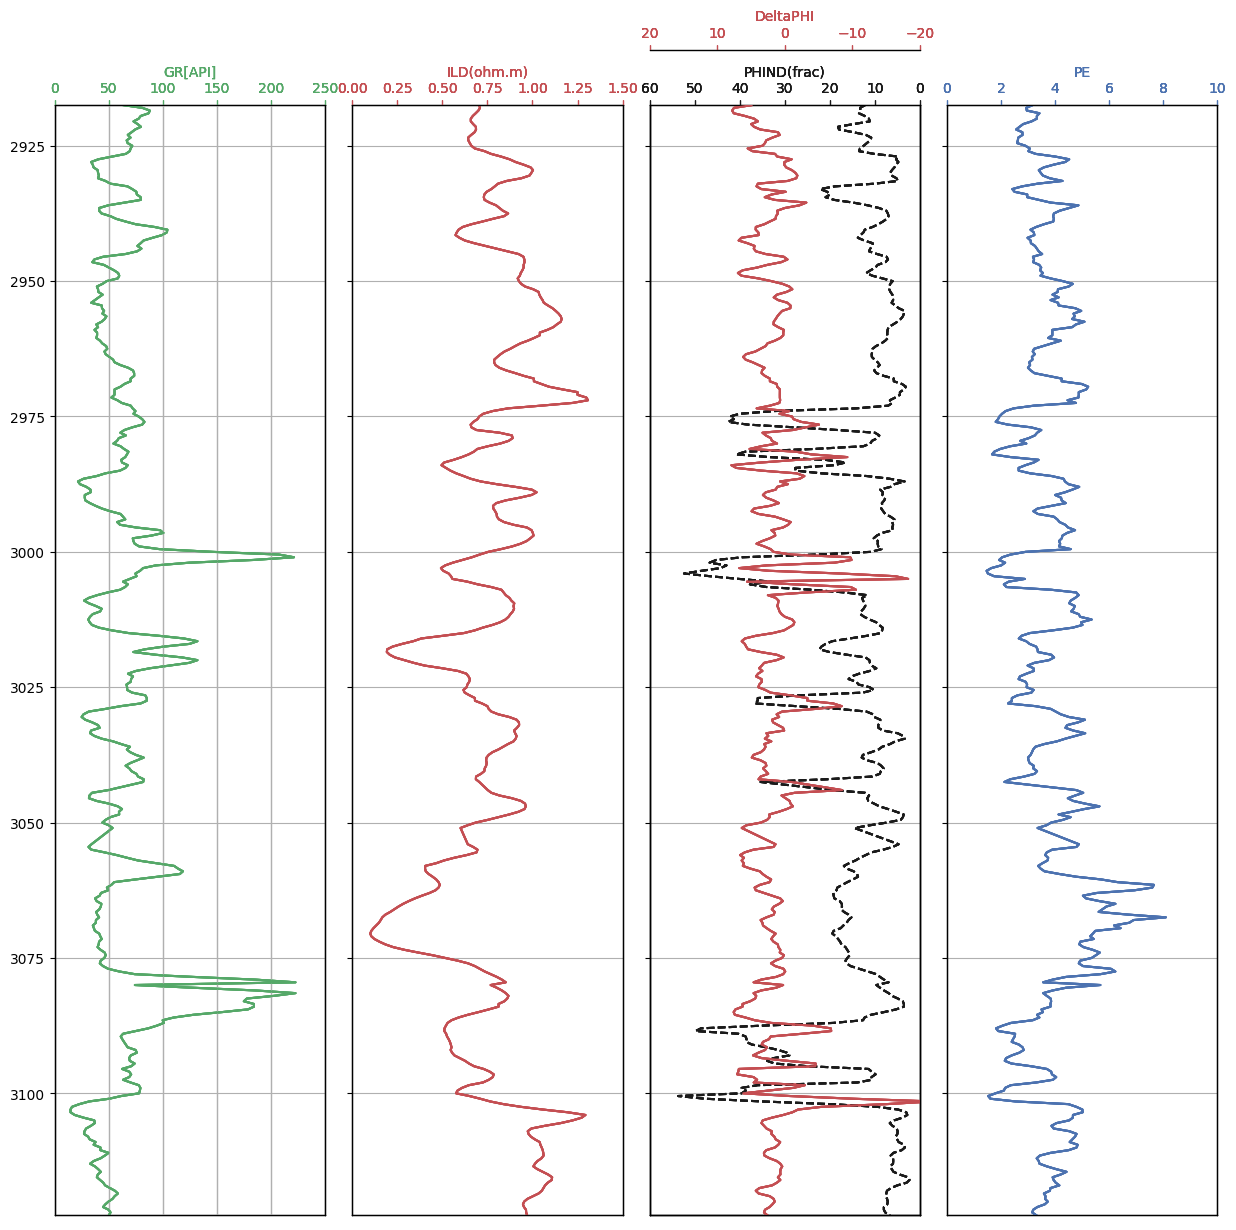

In [301]:
triple_combo_log(ip_data[ip_data['Well Name'] == 'CHURCHMAN BIBLE'])
plt.show()

In [302]:
#identifying null data
#for i in ip_data.columns:
  #  print(i, ip_data[i].isnull().values.any())
#print(ip_data.isnull().sum())

# PE log generation 

First we are going to isoloate wells with and without PE

In [303]:
PE_mask=ip_data['PE'].notnull().values
pred_data=ip_data[PE_mask==False]
ip_data=ip_data[PE_mask]

In [304]:
pred_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,NPHI,PHID
471,3,A1 SH,ALEXANDER D,2887.5,88.710,0.612,6.700,10.6050,NaN,1,1.000,13.955,7.255
472,3,A1 SH,ALEXANDER D,2888.0,92.710,0.583,11.000,12.5150,NaN,1,0.974,18.015,7.015
473,3,A1 SH,ALEXANDER D,2888.5,94.540,0.579,12.000,13.4100,NaN,1,0.949,19.410,7.410
474,3,A1 SH,ALEXANDER D,2889.0,95.310,0.579,11.500,13.7500,NaN,1,0.923,19.500,8.000
475,3,A1 SH,ALEXANDER D,2889.5,93.790,0.572,10.300,13.4050,NaN,1,0.897,18.555,8.255
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,9,C LM,Recruit F9,3129.5,19.160,1.162,2.586,7.6070,NaN,2,0.560,8.900,6.314
3228,9,C LM,Recruit F9,3130.0,20.461,1.031,2.503,8.6935,NaN,2,0.548,9.945,7.442
3229,9,C LM,Recruit F9,3130.5,23.425,0.791,4.017,9.9725,NaN,2,0.536,11.981,7.964
3230,9,C LM,Recruit F9,3131.0,31.562,0.759,5.805,9.5265,NaN,2,0.524,12.429,6.624


In [305]:
ip_data['Well Name'].values

['SHRIMPLIN', 'SHRIMPLIN', 'SHRIMPLIN', 'SHRIMPLIN', 'SHRIMPLIN', ..., 'CHURCHMAN BIBLE', 'CHURCHMAN BIBLE', 'CHURCHMAN BIBLE', 'CHURCHMAN BIBLE', 'CHURCHMAN BIBLE']
Length: 3232
Categories (10, object): ['ALEXANDER D', 'CHURCHMAN BIBLE', 'CROSS H CATTLE', 'KIMZEY A', ..., 'NOLAN', 'Recruit F9', 'SHANKLE', 'SHRIMPLIN']

In [306]:
pred_data['Well Name'].unique()

['ALEXANDER D', 'KIMZEY A', 'Recruit F9']
Categories (10, object): ['ALEXANDER D', 'CHURCHMAN BIBLE', 'CROSS H CATTLE', 'KIMZEY A', ..., 'NOLAN', 'Recruit F9', 'SHANKLE', 'SHRIMPLIN']

In [307]:
# Keep one well away for test defined as blind
blind = ip_data[ip_data['Well Name'] == 'Recruit F9']
train_data=ip_data[ip_data['Well Name'] != 'Recruit F9']

In [308]:
blind['Well Name'].values

['Recruit F9', 'Recruit F9', 'Recruit F9', 'Recruit F9', 'Recruit F9', ..., 'Recruit F9', 'Recruit F9', 'Recruit F9', 'Recruit F9', 'Recruit F9']
Length: 68
Categories (10, object): ['ALEXANDER D', 'CHURCHMAN BIBLE', 'CROSS H CATTLE', 'KIMZEY A', ..., 'NOLAN', 'Recruit F9', 'SHANKLE', 'SHRIMPLIN']

C:\Users\HIMANS~1\AppData\Local\Temp/ipykernel_45592/3788718347.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(train_data.corr(method='pearson'), dtype=np.bool)


<AxesSubplot:>

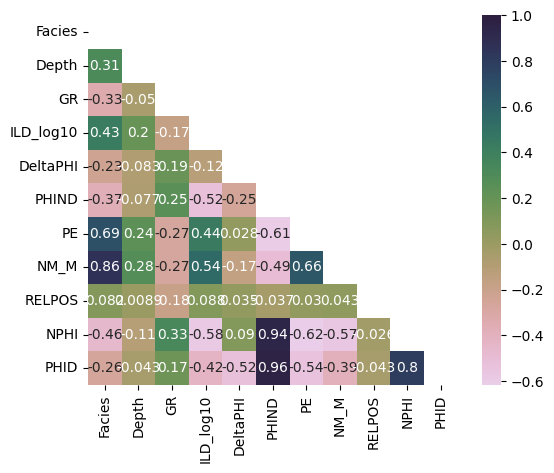

In [309]:
# generate heat map
# isoloate top upper section
mask = np.zeros_like(train_data.corr(method='pearson'), dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

#generate a color map
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)
sns.heatmap(train_data.corr(method='pearson'), annot=True, mask=mask, cmap=cmap, vmax=1.0, square=True)

In [310]:
#check data columns and drop dataset which are not required
train_data.columns
#target=train_data['PE']
#feature_vectors=train_data.drop(['Formation','',], axis=1)

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'NPHI', 'PHID'],
      dtype='object')

In [311]:
target=train_data['PE']
feature_vectors=train_data.drop(['Formation', 'Well Name', 'GR', 'Depth', 'ILD_log10',

       'DeltaPHI', 'PE', 'RELPOS'], axis=1)

In [312]:
target.describe()

count    3164.000000
mean        3.687710
std         0.859788
min         0.200000
25%         3.100000
50%         3.500000
75%         4.277000
max         8.094000
Name: PE, dtype: float64

In [313]:
feature_vectors.describe()

,Facies,PHIND,NM_M,NPHI,PHID
count,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,4.323641,13.489657,1.487674,15.292293,11.687022
std,2.438403,7.756242,0.499927,7.535374,8.799597
min,1.000000,0.550000,1.000000,2.090000,-5.000000
25%,2.000000,8.308000,1.000000,9.671375,6.413500
50%,3.000000,12.117500,1.000000,14.600000,9.322250
75%,6.000000,16.415000,2.000000,19.388750,14.088375
max,9.000000,84.400000,2.000000,85.400000,83.500000


In [314]:
# import required algorithms to do data transformation, training & validation
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [315]:
# split data into training and validation group
x_train, x_val, y_train, y_val=train_test_split(scaled_features, target, test_size=0.3, random_state=42)

In [316]:
# perform training with linear regression and Random Forest regressor
lr=LinearRegression(normalize=True)
#train
lr.fit(x_train,y_train)
#pred on train
y_pred=lr.predict(x_train)

In [317]:
#multi-variable regression
print('Coefficients:\n',lr.coef_)


Coefficients:
 [ 0.44943612 -0.1334907   0.00845289 -0.05108223 -0.18923781]


In [318]:
print('Training MSE: %.2f' % mean_squared_error(y_train,y_pred))
print('Training R2 value: %.2f' % r2_score(y_train,y_pred))

Training MSE: 0.27
Training R2 value: 0.63


In [319]:
yval_pred=lr.predict(x_val)
print('Training MSE: %.2f' % mean_squared_error(y_val,yval_pred))
print('Training R2 value: %.2f' % r2_score(y_val,yval_pred))

Training MSE: 0.32
Training R2 value: 0.60


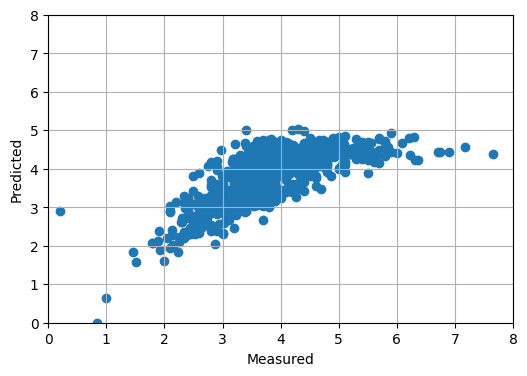

In [320]:
plt.figure(1, figsize=(6,4))
plt.subplot(111)
plt.scatter(y_val, yval_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.xlim(0,8)
plt.ylim(0,8)
plt.grid(True)

In [321]:
pred_data['Well Name'].values

['ALEXANDER D', 'ALEXANDER D', 'ALEXANDER D', 'ALEXANDER D', 'ALEXANDER D', ..., 'Recruit F9', 'Recruit F9', 'Recruit F9', 'Recruit F9', 'Recruit F9']
Length: 917
Categories (10, object): ['ALEXANDER D', 'CHURCHMAN BIBLE', 'CROSS H CATTLE', 'KIMZEY A', ..., 'NOLAN', 'Recruit F9', 'SHANKLE', 'SHRIMPLIN']

In [322]:
data = pred_data[pred_data['Well Name'] == 'Recruit F9']

In [323]:
data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,NPHI,PHID
3214,9,A1 SH,Recruit F9,2902.0,64.210,0.471,10.200,10.9350,NaN,2,0.256,16.035,5.835
3215,9,A1 SH,Recruit F9,2902.5,63.820,0.467,11.200,10.6550,NaN,2,0.231,16.255,5.055
3216,9,A1 SH,Recruit F9,2903.0,64.740,0.458,15.100,12.7050,NaN,2,0.205,20.255,5.155
3217,9,A1 LM,Recruit F9,2907.0,32.580,0.290,10.300,14.5200,NaN,2,1.000,19.670,9.370
3218,9,A1 LM,Recruit F9,2907.5,25.140,0.294,7.100,12.4800,NaN,2,0.985,16.030,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,9,C LM,Recruit F9,3129.5,19.160,1.162,2.586,7.6070,NaN,2,0.560,8.900,6.314
3228,9,C LM,Recruit F9,3130.0,20.461,1.031,2.503,8.6935,NaN,2,0.548,9.945,7.442
3229,9,C LM,Recruit F9,3130.5,23.425,0.791,4.017,9.9725,NaN,2,0.536,11.981,7.964
3230,9,C LM,Recruit F9,3131.0,31.562,0.759,5.805,9.5265,NaN,2,0.524,12.429,6.624


In [324]:
features=data[['Facies', 'PHIND', 'NM_M',
       'NPHI', 'PHID']]

In [325]:
features

,Facies,PHIND,NM_M,NPHI,PHID
3214,9,10.9350,2,16.035,5.835
3215,9,10.6550,2,16.255,5.055
3216,9,12.7050,2,20.255,5.155
3217,9,14.5200,2,19.670,9.370
3218,9,12.4800,2,16.030,8.930
...,...,...,...,...,...
3227,9,7.6070,2,8.900,6.314
3228,9,8.6935,2,9.945,7.442
3229,9,9.9725,2,11.981,7.964
3230,9,9.5265,2,12.429,6.624


In [341]:
scaled_features = scaler.transform(features)

# Random forest

In [342]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [344]:
y_predict = rfr.predict(x_val)

print('Training R2 score: %.2f' %rfr.score(x_train, y_train))
print('Validation R2 score: %.2f' %r2_score(y_val, y_predict))
print('Training rmse value: %.2f' %mean_squared_error(rfr.predict(x_train), y_train, squared=False))
print('Validation rmse value: %.2f' %mean_squared_error(y_val, y_predict, squared=False))


Training R2 score: 0.95
Validation R2 score: 0.69
Training rmse value: 0.18
Validation rmse value: 0.50


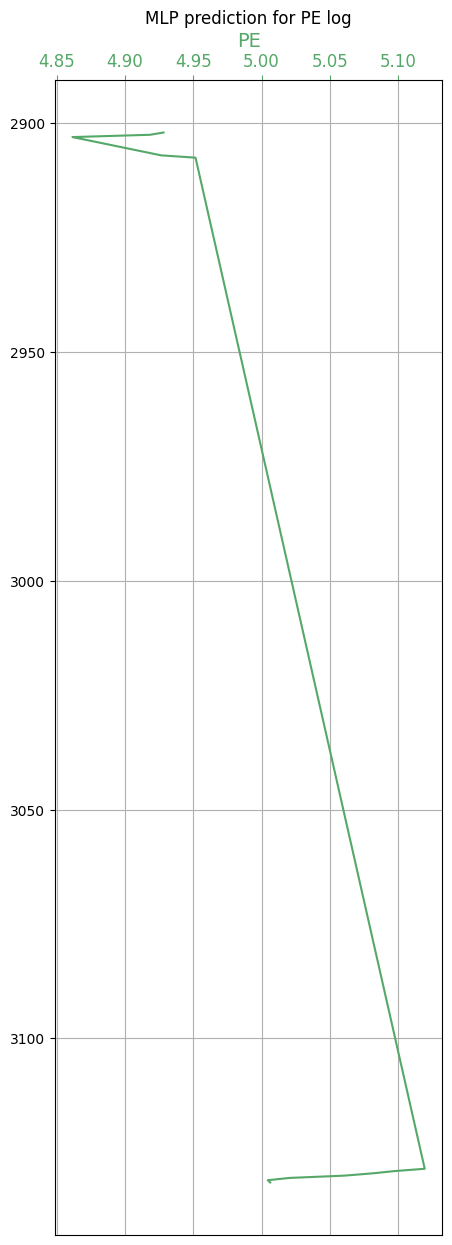

In [338]:
fig, axes = plt.subplots(figsize=(5,15))
axes.invert_yaxis()
axes.plot(PE_pred, data.Depth, '-g')
axes.set_title('MLP prediction for PE log')
axes.set_xlabel('PE', color='g', fontsize = 14)
axes.tick_params(axis='x', colors='g', labelsize = 12)
axes.xaxis.tick_top()
axes.xaxis.set_label_position('top')
axes.grid(True)

# KNN

In [329]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [330]:
y_predict = knn.predict(x_val)

print('Training R2 score: %.2f' %knn.score(x_train, y_train))
print('Validation R2 score: %.2f' %r2_score(y_val, y_predict))
print('Training rmse value: %.2f' %mean_squared_error(knn.predict(x_train), y_train, squared=False))
print('Validation rmse value: %.2f' %mean_squared_error(y_val, y_predict, squared=False))

Training R2 score: 0.79
Validation R2 score: 0.68
Training rmse value: 0.39
Validation rmse value: 0.50


In [331]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(max_iter=400)
mlp.fit(x_train, y_train)

MLPRegressor(max_iter=400)

In [332]:
y_predict = mlp.predict(x_val)

print('Training R2 score: %.2f' %mlp.score(x_train, y_train))
print('Validation R2 score: %.2f' %r2_score(y_val, y_predict))
print('Training rmse value: %.2f' %mean_squared_error(mlp.predict(x_train), y_train, squared=False))
print('Validation rmse value: %.2f' %mean_squared_error(y_val, y_predict, squared=False))

Training R2 score: 0.69
Validation R2 score: 0.66
Training rmse value: 0.47
Validation rmse value: 0.52


In [333]:
PE_pred = mlp.predict(scaled_features)
data['mlp_PE'] = PE_pred

C:\Users\HIMANS~1\AppData\Local\Temp/ipykernel_45592/2729311640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mlp_PE'] = PE_pred


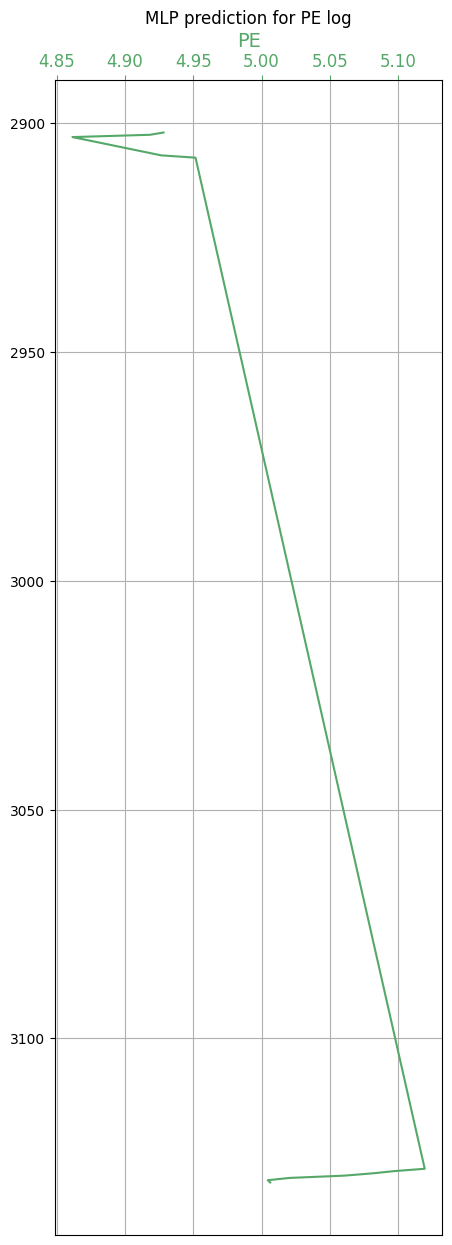

In [335]:
#Plot the value

fig, axes = plt.subplots(figsize=(5,15))
axes.invert_yaxis()
axes.plot(PE_pred, data.Depth, '-g')
axes.set_title('MLP prediction for PE log')
axes.set_xlabel('PE', color='g', fontsize = 14)
axes.tick_params(axis='x', colors='g', labelsize = 12)
axes.xaxis.tick_top()
axes.xaxis.set_label_position('top')
axes.grid(True)

# Cluster analysis

C:\Users\HIMANS~1\AppData\Local\Temp/ipykernel_45592/1317468589.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(ip_data.corr(method='pearson'), dtype=np.bool)


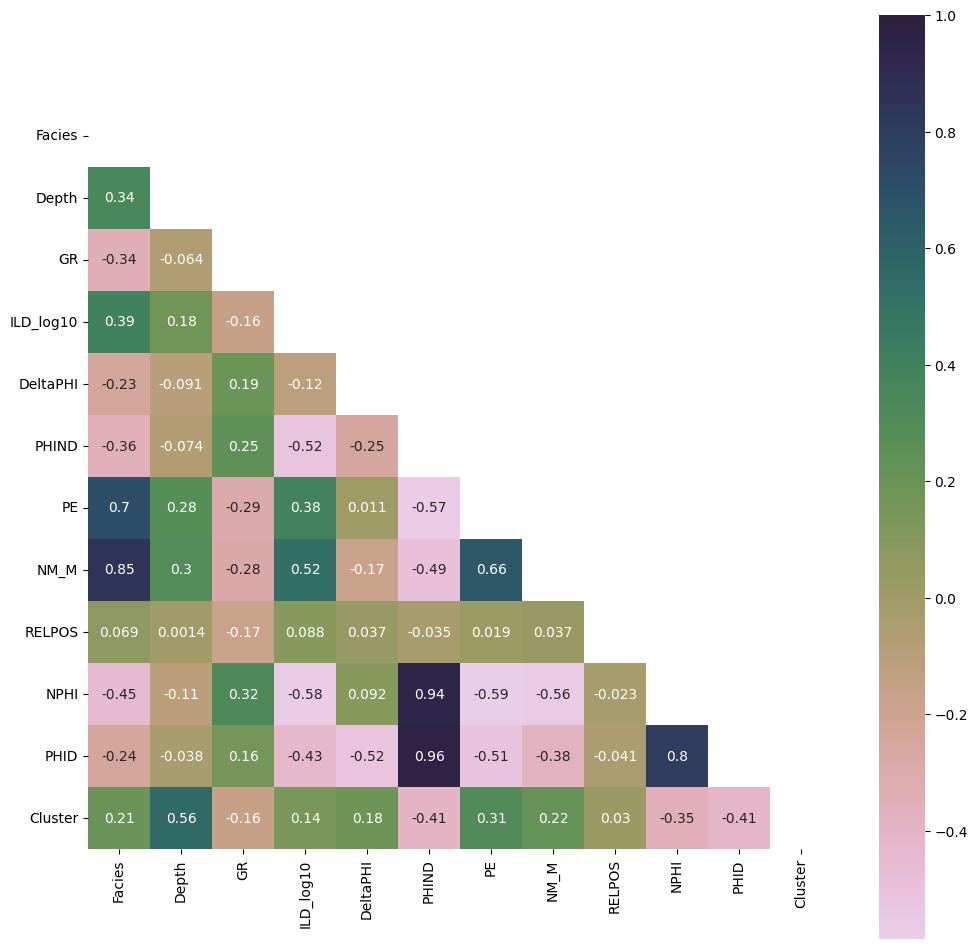

In [258]:
# generate heat map
# isoloate top upper section
mask = np.zeros_like(ip_data.corr(method='pearson'), dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

#generate a color map
plt.figure(figsize=(12,12))
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)
sns.heatmap(ip_data.corr(method='pearson'), annot=True, mask=mask, cmap=cmap, vmax=1.0, square=True)
plt.show()

In [260]:
ip_data.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'NPHI', 'PHID', 'Cluster'],
      dtype='object')

In [261]:
# remove input logs not necessary

feature_vectors=ip_data.drop(['Facies', 'Formation', 'Well Name',
       'DeltaPHI',  'NM_M', 'RELPOS', 'NPHI', 'PHID'], axis=1)



In [262]:
feature_vectors.columns

Index(['Depth', 'GR', 'ILD_log10', 'PHIND', 'PE', 'Cluster'], dtype='object')

In [263]:
# data transform
from sklearn import preprocessing
scaler=preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [264]:
# clustering
from sklearn.cluster import KMeans

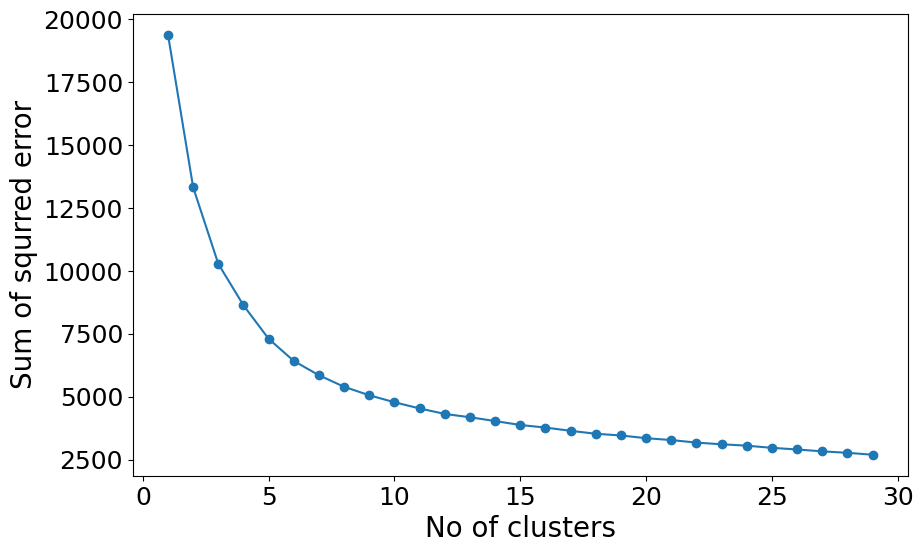

In [265]:
# KNN clustering , find out number of clusters
inertias = []
means=[]
maxK=30

for k in range(1, maxK):
    kmeans=KMeans(n_clusters=k, random_state=100).fit(scaled_features)
    means.append(k)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(means, inertias, 'o-')
plt.ylabel('Sum of squrred error', fontsize=20)
plt.xlabel('No of clusters',fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

In [266]:
# fit the data with number of cluster = 5
kmeans = KMeans(n_clusters=5, random_state=100)
kmeans.fit_predict(scaled_features)

array([3, 0, 0, ..., 3, 3, 3])

In [218]:
ip_data['Cluster'] = kmeans.labels_


In [277]:
facies_colors = sns.color_palette("Set1", 5)

def make_facies_log_plot(logs, facies_colors, label):
    # reset to original matplotlib style
    # seaborn doesn't look as good for this
    import matplotlib as mpl
    mpl.rcParams.update(mpl.rcParamsDefault)
    
    #make sure logs are sorted by depth 
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs[label].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(10, 10))
    ax[0].plot(logs['GR'], logs.Depth, '-g')
    ax[1].plot(logs['ILD_log10'], logs.Depth, '-')
    ax[2].plot(logs['PE'], logs.Depth, '-', color='r')
    ax[3].plot(logs['DeltaPHI'], logs.Depth, '-', color='k')
    ax[4].plot(logs['PHIND'], logs.Depth, '-', color='k')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=5)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((18*' ').join(['Cluster1', 'Cluster2', 'Cluster3','Cluster4','Cluster5']), fontsize=8)
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel('GR', fontsize=12)
    ax[0].set_xlim(0,350)
    ax[0].set_ylabel('Sample', fontsize=16)
    ax[0].tick_params(labelsize=12)
    ax[0].grid(b=False)
    ax[1].set_xlabel("Rt (ohm-m)", fontsize=12)
    ax[1].set_xlim(0,1.5)
    ax[1].grid(b=False)
    ax[1].tick_params(labelsize=12)
    ax[2].set_xlabel("PE", fontsize=12)
    ax[2].set_xlim(0,10)
    ax[2].grid(b=False)
    ax[2].tick_params(labelsize=12)
    ax[3].set_xlabel("DeltaPHI", fontsize=12)
#     ax[3].set_xlim(2,3)
    ax[3].grid(b=False)
    ax[3].tick_params(labelsize=12)
    ax[4].set_xlabel("PHIND", fontsize=12)
    ax[4].set_xlim(0,60)
    ax[4].grid(b=False)
    ax[4].tick_params(labelsize=12)
    ax[5].set_xlabel('Facies', fontsize=16)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]);ax[5].set_yticklabels([]);
    ax[5].set_xticklabels([])
    
    return f

In [280]:
ip_data['Well Name'].values

['SHRIMPLIN', 'SHRIMPLIN', 'SHRIMPLIN', 'SHRIMPLIN', 'SHRIMPLIN', ..., 'CHURCHMAN BIBLE', 'CHURCHMAN BIBLE', 'CHURCHMAN BIBLE', 'CHURCHMAN BIBLE', 'CHURCHMAN BIBLE']
Length: 3232
Categories (10, object): ['ALEXANDER D', 'CHURCHMAN BIBLE', 'CROSS H CATTLE', 'KIMZEY A', ..., 'NOLAN', 'Recruit F9', 'SHANKLE', 'SHRIMPLIN']

C:\Users\HIMANS~1\AppData\Local\Temp/ipykernel_45592/2398697311.py:44: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[0].grid(b=False)
C:\Users\HIMANS~1\AppData\Local\Temp/ipykernel_45592/2398697311.py:47: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[1].grid(b=False)
C:\Users\HIMANS~1\AppData\Local\Temp/ipykernel_45592/2398697311.py:51: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[2].grid(b=False)
C:\Users\HIMANS~1\AppData\Local\Temp/ipykernel_45592/2398697311.py:55: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old n

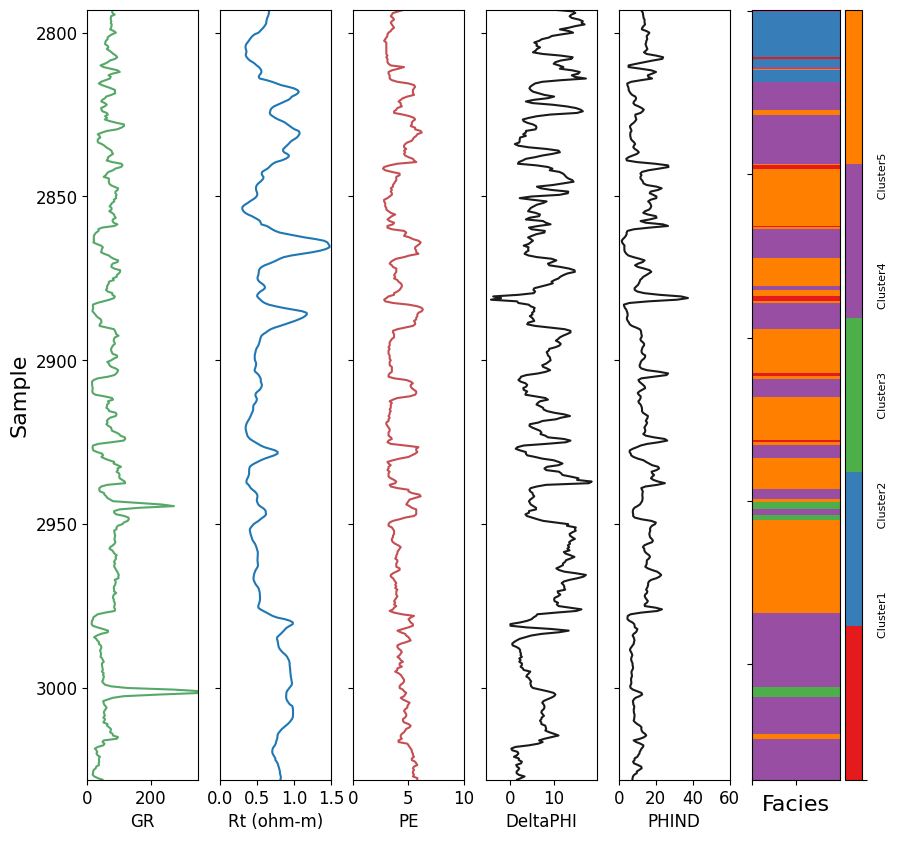

In [281]:
# check particular well

make_facies_log_plot(ip_data[ip_data['Well Name']== 'SHRIMPLIN'],facies_colors, label='Cluster')
plt.show()

# check particular well
make_facies_log_plot(ip_data[ip_data['Well Name'] == 'CHURCHMAN BIBLE'],facies_colors, label='Cluster')
plt.show()

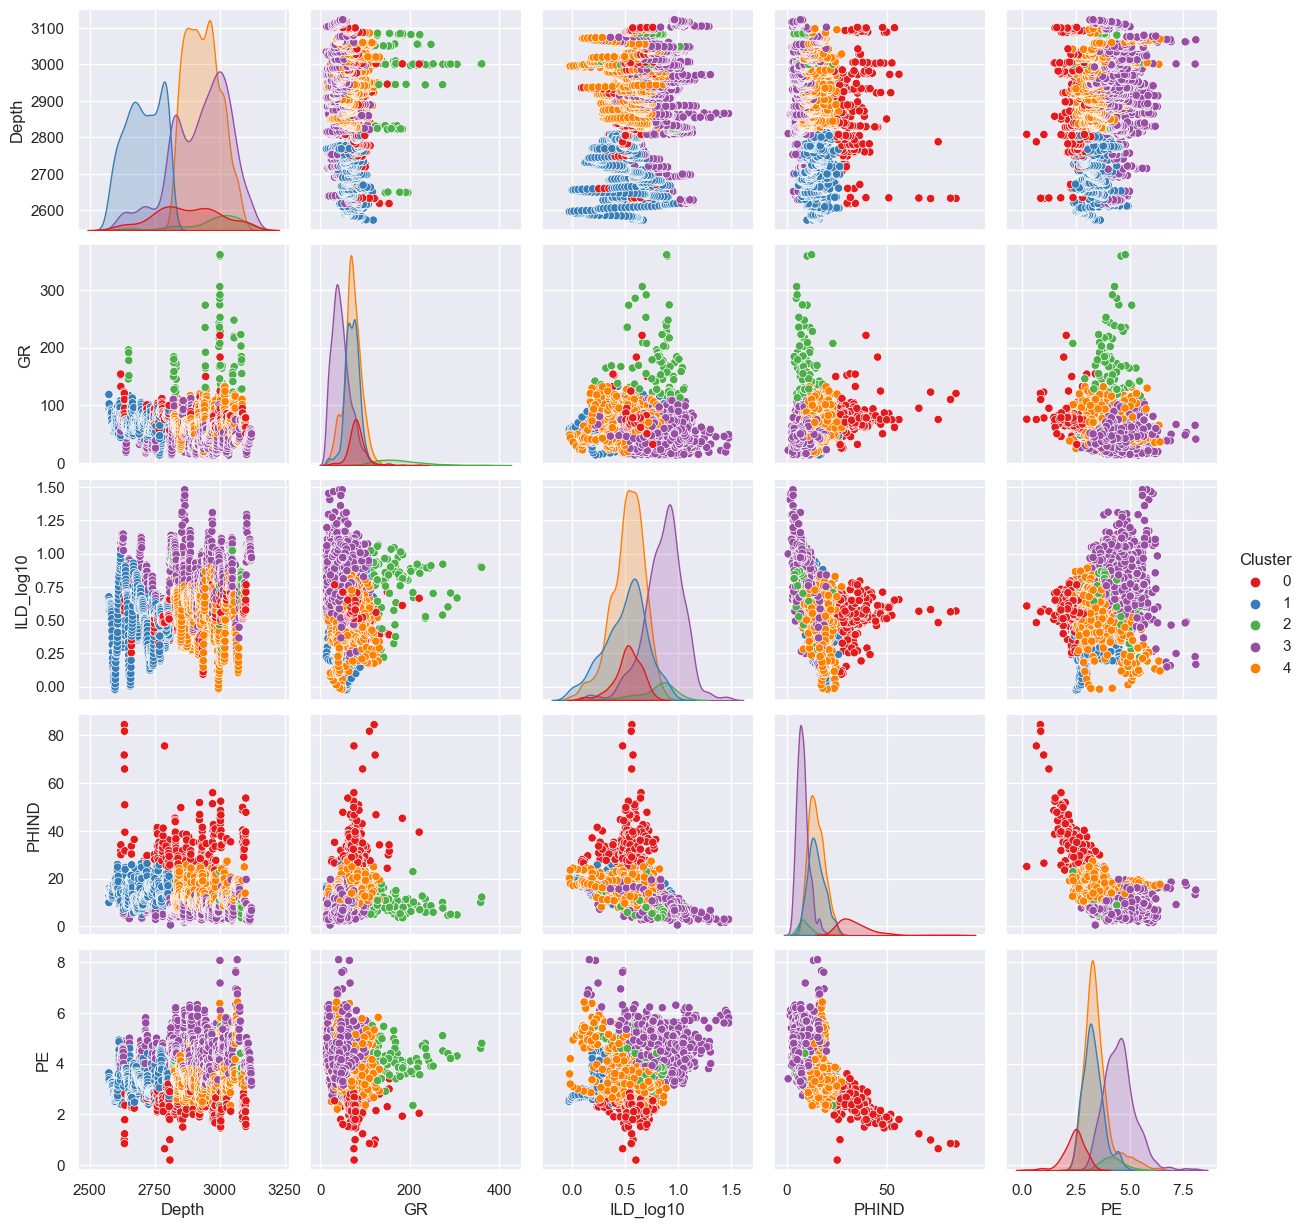

In [271]:
# create pair plot'
#save plot display 
inline_rc =dict(mpl.rcParams)
sns.set()
sns.pairplot(ip_data.drop(['Facies', 'Formation', 'Well Name',
       'DeltaPHI',  'NM_M', 'RELPOS', 'NPHI', 'PHID'], axis=1),
             hue='Cluster', palette = facies_colors)
# swith back to default matplot plot style
mpl.rcParams.update(inline_rc)

(-0.10124655185, 1.55529745485)

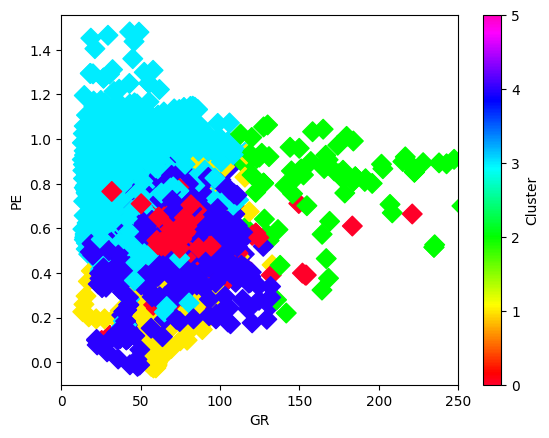

In [283]:
plt.figure()
plt.scatter(ip_data.GR, ip_data.ILD_log10, c=ip_data.Cluster, 
            marker= 'D', s=100, cmap='gist_rainbow', vmin=0, vmax=5)
plt.colorbar(label='Cluster')
plt.xlabel('GR')
plt.ylabel('PE')
plt.xlim(0,250)
plt.ylim()

In [3]:
data = ip_data[ip_data['Well Name'] == 'Recruit F9']